In [1]:
import pandas as pd

df = pd.read_csv('BTC-USD_17.09.2014-29.04.2024.csv')

df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%y')

In [2]:
from datetime import datetime

def prompt_for_date(prompt_message, comparison_date=None, must_be_after=False, max_date=None):
    while True:
        date_input = input(prompt_message)
        try:
            date = datetime.strptime(date_input, "%d-%m-%Y")
            if comparison_date is not None:
                if must_be_after and date <= comparison_date:
                    print("The date must be after %s." % comparison_date.strftime("%d-%m-%Y"))
                    continue
                elif not must_be_after and date < comparison_date:
                    print("The date must be after or equal to %s." % comparison_date.strftime("%d-%m-%Y"))
                    continue
            if max_date is not None and date > max_date:
                print("The date must not be after %s." % max_date.strftime("%d-%m-%Y"))
                continue
            return date
        except ValueError:
            print("Invalid date format. Please use the format dd-mm-yyyy.")

min_allowed_start_date = datetime.strptime("06-04-2015", "%d-%m-%Y")
max_allowed_end_date = datetime.strptime("29-04-2024", "%d-%m-%Y")

start_date = prompt_for_date(f"Enter the start date (dd-mm-yyyy). Starting date cannot be before ${min_allowed_start_date}: ", min_allowed_start_date, must_be_after=False)
end_date = prompt_for_date(f"Enter the end date (dd-mm-yyyy). End date cannot be after ${max_allowed_end_date} and must be after the start date: ", start_date, must_be_after=True, max_date=max_allowed_end_date)

def prompt_for_number(prompt_message, minimum=None, condition=lambda x: True):
    while True:
        try:
            number = float(input(prompt_message))
            if minimum is not None and number <= minimum:
                print("The value must be greater than %s." % minimum)
                continue
            if not condition(number):
                print("The input does not meet the required condition.")
                continue
            return number
        except ValueError:
            print("Please enter a valid number.")

initial_balance = prompt_for_number("Enter the initial balance of the trading bot wallet: ", minimum=0)
profit_percent = prompt_for_number("Enter the % profit (value must be >= 1): ", minimum=1.00) 

start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

ema_start_date = start_date - pd.Timedelta(days=200)
ema_end_date = end_date - pd.Timedelta(days=200)
initial_ema_start_date = start_date - pd.Timedelta(days=200)

start_date_df_ascending_6month = pd.to_datetime('2020-10-01')
end_date_df_ascending_6month  = pd.to_datetime('2021-04-01')
start_date_df_descending_6month = pd.to_datetime('2021-10-01')
end_date_df_descending_6month  = pd.to_datetime('2022-09-01')
start_date_df_stagnation_6month = pd.to_datetime('2015-11-01')
end_date_df_stagnation_6month  = pd.to_datetime('2016-04-01')
start_date_df_combined_1year = pd.to_datetime('2021-10-01')
end_date_df_combined_1year  = pd.to_datetime('2022-10-01')


In [3]:
ema_filtered_df_ascending_6month = df[(df['Date'] >= start_date_df_ascending_6month - pd.Timedelta(days=200)) & (df['Date'] <= end_date_df_ascending_6month)]
ema_filtered_df_descending_6month = df[(df['Date'] >= start_date_df_descending_6month - pd.Timedelta(days=200)) & (df['Date'] <= end_date_df_descending_6month)]
ema_filtered_df_stagnation_6month = df[(df['Date'] >= start_date_df_stagnation_6month - pd.Timedelta(days=200)) & (df['Date'] <= end_date_df_stagnation_6month)]
ema_filtered_df_combined_1year = df[(df['Date'] >= start_date_df_combined_1year - pd.Timedelta(days=200)) & (df['Date'] <= end_date_df_combined_1year)]

ema_filtered_df = df[(df['Date'] >= initial_ema_start_date) & (df['Date'] <= end_date)]
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

filtered_df_ascending_6month = df[(df['Date'] >= start_date_df_ascending_6month) & (df['Date'] <= end_date_df_ascending_6month)]
filtered_df_descending_6month = df[(df['Date'] >= start_date_df_descending_6month) & (df['Date'] <= end_date_df_descending_6month)]
filtered_df_stagnation_6month = df[(df['Date'] >= start_date_df_stagnation_6month) & (df['Date'] <= end_date_df_stagnation_6month)]
filtered_df_combined_1year = df[(df['Date'] >= start_date_df_combined_1year) & (df['Date'] <= end_date_df_combined_1year)]

filtered_df['Position'] = 0
filtered_df_ascending_6month['Position'] = 0
filtered_df_descending_6month['Position'] = 0
filtered_df_stagnation_6month['Position'] = 0
filtered_df_combined_1year['Position'] = 0

filtered_df.rename(columns={'Date': 'date', 'Open': 'open', 'High': 'high', 'Low': 'low','Close': 'close', 'Volume': 'volume', 'Prev_Open': 'prevOpen', 'Prev_Close': 'prevClose', 'Signal': 'signal', 'Position': 'position'}, inplace=True)
filtered_df.insert(1, 'time', '00:00')
filtered_df['date'] = filtered_df['date'].dt.strftime('%m/%d/%Y')
filtered_df['date'] = pd.to_datetime(filtered_df['date'])
filtered_df.drop(columns=['Adj Close'], inplace=True)

filtered_df_ascending_6month.rename(columns={'Date': 'date', 'Open': 'open', 'High': 'high', 'Low': 'low','Close': 'close', 'Volume': 'volume', 'Prev_Open': 'prevOpen', 'Prev_Close': 'prevClose', 'Signal': 'signal', 'Position': 'position'}, inplace=True)
filtered_df_ascending_6month.insert(1, 'time', '00:00')
filtered_df_ascending_6month['date'] = filtered_df_ascending_6month['date'].dt.strftime('%m/%d/%Y')
filtered_df_ascending_6month['date'] = pd.to_datetime(filtered_df_ascending_6month['date'])
filtered_df_ascending_6month.drop(columns=['Adj Close'], inplace=True)

filtered_df_descending_6month.rename(columns={'Date': 'date', 'Open': 'open', 'High': 'high', 'Low': 'low','Close': 'close', 'Volume': 'volume', 'Prev_Open': 'prevOpen', 'Prev_Close': 'prevClose', 'Signal': 'signal', 'Position': 'position'}, inplace=True)
filtered_df_descending_6month.insert(1, 'time', '00:00')
filtered_df_descending_6month['date'] = filtered_df_descending_6month['date'].dt.strftime('%m/%d/%Y')
filtered_df_descending_6month['date'] = pd.to_datetime(filtered_df_descending_6month['date'])
filtered_df_descending_6month.drop(columns=['Adj Close'], inplace=True)

filtered_df_stagnation_6month.rename(columns={'Date': 'date', 'Open': 'open', 'High': 'high', 'Low': 'low','Close': 'close', 'Volume': 'volume', 'Prev_Open': 'prevOpen', 'Prev_Close': 'prevClose', 'Signal': 'signal', 'Position': 'position'}, inplace=True)
filtered_df_stagnation_6month.insert(1, 'time', '00:00')
filtered_df_stagnation_6month['date'] = filtered_df_stagnation_6month['date'].dt.strftime('%m/%d/%Y')
filtered_df_stagnation_6month.drop(columns=['Adj Close'], inplace=True)

filtered_df_combined_1year.rename(columns={'Date': 'date', 'Open': 'open', 'High': 'high', 'Low': 'low','Close': 'close', 'Volume': 'volume', 'Prev_Open': 'prevOpen', 'Prev_Close': 'prevClose', 'Signal': 'signal', 'Position': 'position'}, inplace=True)
filtered_df_combined_1year.insert(1, 'time', '00:00')
filtered_df_combined_1year['date'] = filtered_df_combined_1year['date'].dt.strftime('%m/%d/%Y')
filtered_df_stagnation_6month['date'] = pd.to_datetime(filtered_df_stagnation_6month['date'])
filtered_df_combined_1year.drop(columns=['Adj Close'], inplace=True)

ema_filtered_df.rename(columns={'Date': 'date', 'Open': 'open', 'High': 'high', 'Low': 'low','Close': 'close', 'Volume': 'volume', 'Prev_Open': 'prevOpen', 'Prev_Close': 'prevClose', 'Signal': 'signal', 'Position': 'position'}, inplace=True)
ema_filtered_df.insert(1, 'time', '00:00')
ema_filtered_df['date'] = ema_filtered_df['date'].dt.strftime('%m/%d/%Y')
filtered_df_combined_1year['date'] = pd.to_datetime(filtered_df_combined_1year['date'])
ema_filtered_df.drop(columns=['Adj Close'], inplace=True)

ema_filtered_df_ascending_6month.rename(columns={'Date': 'date', 'Open': 'open', 'High': 'high', 'Low': 'low','Close': 'close', 'Volume': 'volume', 'Prev_Open': 'prevOpen', 'Prev_Close': 'prevClose', 'Signal': 'signal', 'Position': 'position'}, inplace=True)
ema_filtered_df_ascending_6month.insert(1, 'time', '00:00')
ema_filtered_df_ascending_6month['date'] = ema_filtered_df_ascending_6month['date'].dt.strftime('%m/%d/%Y')
ema_filtered_df_ascending_6month.drop(columns=['Adj Close'], inplace=True)

ema_filtered_df_descending_6month.rename(columns={'Date': 'date', 'Open': 'open', 'High': 'high', 'Low': 'low','Close': 'close', 'Volume': 'volume', 'Prev_Open': 'prevOpen', 'Prev_Close': 'prevClose', 'Signal': 'signal', 'Position': 'position'}, inplace=True)
ema_filtered_df_descending_6month.insert(1, 'time', '00:00')
ema_filtered_df_descending_6month['date'] = ema_filtered_df_descending_6month['date'].dt.strftime('%m/%d/%Y')
ema_filtered_df_descending_6month.drop(columns=['Adj Close'], inplace=True)

ema_filtered_df_stagnation_6month.rename(columns={'Date': 'date', 'Open': 'open', 'High': 'high', 'Low': 'low','Close': 'close', 'Volume': 'volume', 'Prev_Open': 'prevOpen', 'Prev_Close': 'prevClose', 'Signal': 'signal', 'Position': 'position'}, inplace=True)
ema_filtered_df_stagnation_6month.insert(1, 'time', '00:00')
ema_filtered_df_stagnation_6month['date'] = ema_filtered_df_stagnation_6month['date'].dt.strftime('%m/%d/%Y')
ema_filtered_df_stagnation_6month.drop(columns=['Adj Close'], inplace=True)

ema_filtered_df_combined_1year.rename(columns={'Date': 'date', 'Open': 'open', 'High': 'high', 'Low': 'low','Close': 'close', 'Volume': 'volume', 'Prev_Open': 'prevOpen', 'Prev_Close': 'prevClose', 'Signal': 'signal', 'Position': 'position'}, inplace=True)
ema_filtered_df_combined_1year.insert(1, 'time', '00:00')
ema_filtered_df_combined_1year['date'] = ema_filtered_df_combined_1year['date'].dt.strftime('%m/%d/%Y')
ema_filtered_df_combined_1year.drop(columns=['Adj Close'], inplace=True)

C:\Users\Pako\AppData\Local\Temp\ipykernel_16520\108213217.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Position'] = 0
C:\Users\Pako\AppData\Local\Temp\ipykernel_16520\108213217.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_ascending_6month['Position'] = 0
C:\Users\Pako\AppData\Local\Temp\ipykernel_16520\108213217.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [4]:
def calculateEmaValues(outputDataSet, inputDataSet):
    ema_lengths = [1, 20, 25, 30, 35, 40, 45, 50, 55, 200]
    ema_values = {}
    for length in ema_lengths:
        ema = inputDataSet['close'].ewm(span=length, adjust=False).mean()
        ema_values[f'ema-{length}'] = ema
        outputDataSet[f'ema-{length}'] = ema

    return ema_values

In [5]:
ema_values_filtered = calculateEmaValues(filtered_df, ema_filtered_df)
ema_values_filtered_asc = calculateEmaValues(filtered_df_ascending_6month, ema_filtered_df_ascending_6month)
ema_values_filtered_dsc = calculateEmaValues(filtered_df_descending_6month, ema_filtered_df_descending_6month)
ema_values_filtered_stg = calculateEmaValues(filtered_df_stagnation_6month, ema_filtered_df_stagnation_6month)
ema_values_filtered_com = calculateEmaValues(filtered_df_combined_1year, ema_filtered_df_combined_1year)

C:\Users\Pako\AppData\Local\Temp\ipykernel_16520\479581174.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outputDataSet[f'ema-{length}'] = ema
C:\Users\Pako\AppData\Local\Temp\ipykernel_16520\479581174.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outputDataSet[f'ema-{length}'] = ema
C:\Users\Pako\AppData\Local\Temp\ipykernel_16520\479581174.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [6]:
def calculate_rsi(dataSet, period=14):
    delta = dataSet['close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

In [7]:
filtered_df['rsi'] = calculate_rsi(filtered_df)
filtered_df_ascending_6month['rsi'] = calculate_rsi(filtered_df_ascending_6month)
filtered_df_descending_6month['rsi'] = calculate_rsi(filtered_df_descending_6month)
filtered_df_stagnation_6month['rsi'] = calculate_rsi(filtered_df_stagnation_6month)
filtered_df_combined_1year['rsi'] = calculate_rsi(filtered_df_combined_1year)

C:\Users\Pako\AppData\Local\Temp\ipykernel_16520\973548999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['rsi'] = calculate_rsi(filtered_df)
C:\Users\Pako\AppData\Local\Temp\ipykernel_16520\973548999.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_ascending_6month['rsi'] = calculate_rsi(filtered_df_ascending_6month)
C:\Users\Pako\AppData\Local\Temp\ipykernel_16520\973548999.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [8]:
def checkMarketTrend(dataSet):
    dataSet['trend'] = dataSet[['ema-20', 'ema-25', 'ema-30', 'ema-35', 'ema-40', 'ema-45', 'ema-50', 'ema-55']].apply(lambda x: all(x[i] > x[i+1] for i in range(len(x)-1)), axis=1).astype(int)

In [9]:
checkMarketTrend(filtered_df)
checkMarketTrend(filtered_df_ascending_6month)
checkMarketTrend(filtered_df_descending_6month)
checkMarketTrend(filtered_df_stagnation_6month)
checkMarketTrend(filtered_df_combined_1year)

C:\Users\Pako\AppData\Local\Temp\ipykernel_16520\1264709472.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dataSet['trend'] = dataSet[['ema-20', 'ema-25', 'ema-30', 'ema-35', 'ema-40', 'ema-45', 'ema-50', 'ema-55']].apply(lambda x: all(x[i] > x[i+1] for i in range(len(x)-1)), axis=1).astype(int)
C:\Users\Pako\AppData\Local\Temp\ipykernel_16520\1264709472.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataSet['trend'] = dataSet[['ema-20', 'ema-25', 'ema-30', 'ema-35', 'ema-40', 'ema-45', 'ema-50', 'ema-55']].apply(lambda x: all(x[i] > x[i+1] for i in ra

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

def printInputChart(ema_values, dataSet):
    dataSet['date'] = pd.to_datetime(dataSet['date'])
    for length, color in zip(ema_values.keys(),
                             ['#013220', '#f5eb5d', '#f5b771', '#f5b056', '#f57b4e', '#f56d58', '#f57d51', '#f55151', '#aa2707', '#00008B']):
        plt.plot(dataSet['date'], ema_values[length][200:], label=length, color=color, linewidth=2)

    plt.xlabel('Deň')
    plt.ylabel('Cena [USD]')
    plt.title('Cena s ema indikátormi')
    plt.legend(['Cena', 'EMA-20', 'EMA-25', 'EMA-30', 'EMA-35', 'EMA-40', 'EMA-45', 'EMA-50', 'EMA-55', 'EMA-200'])
    plt.grid(True)

    plt.show()

C:\Users\Pako\AppData\Local\Temp\ipykernel_16520\2064460864.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataSet['date'] = pd.to_datetime(dataSet['date'])


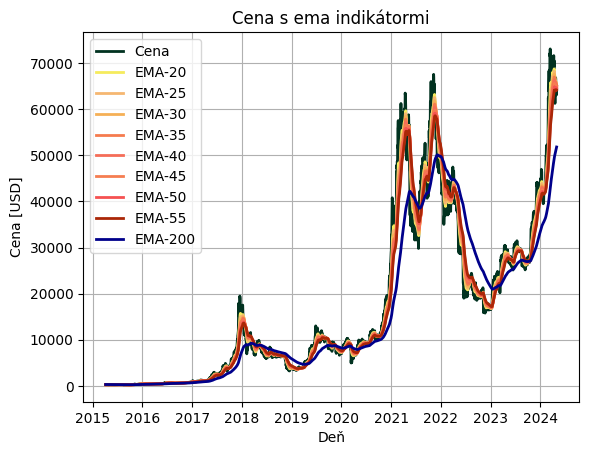

C:\Users\Pako\AppData\Local\Temp\ipykernel_16520\2064460864.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataSet['date'] = pd.to_datetime(dataSet['date'])


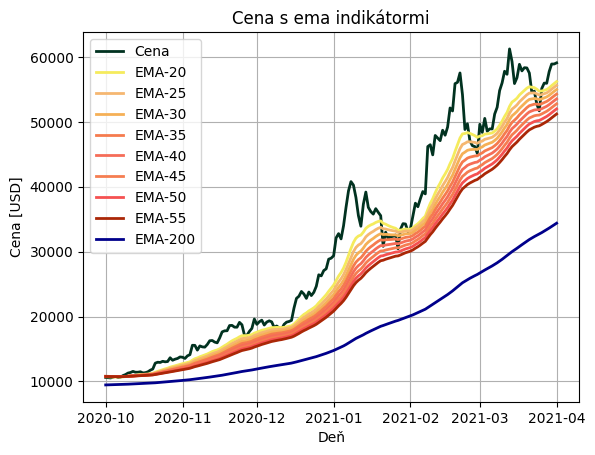

C:\Users\Pako\AppData\Local\Temp\ipykernel_16520\2064460864.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataSet['date'] = pd.to_datetime(dataSet['date'])


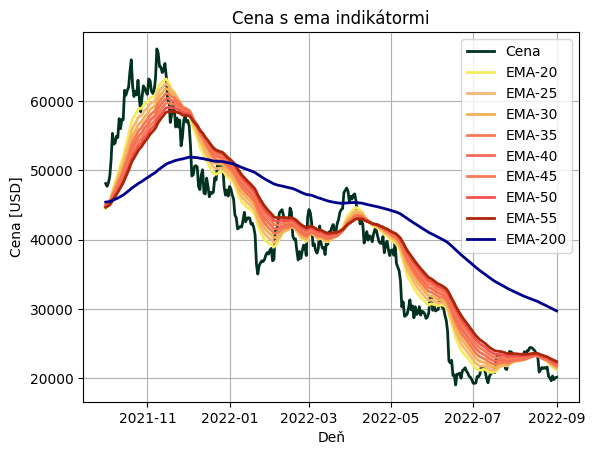

C:\Users\Pako\AppData\Local\Temp\ipykernel_16520\2064460864.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataSet['date'] = pd.to_datetime(dataSet['date'])


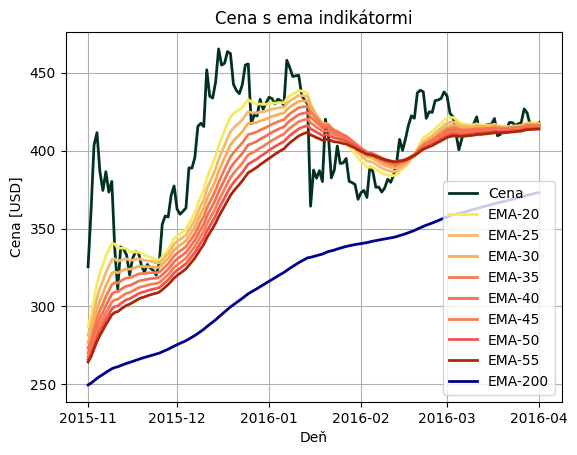

C:\Users\Pako\AppData\Local\Temp\ipykernel_16520\2064460864.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataSet['date'] = pd.to_datetime(dataSet['date'])


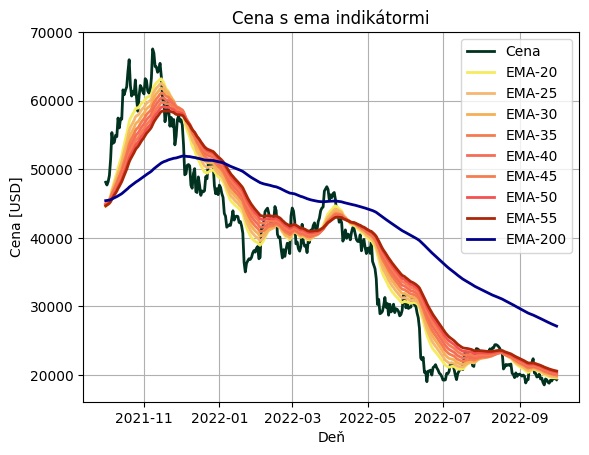

In [11]:
printInputChart(ema_values_filtered, filtered_df)
printInputChart(ema_values_filtered_asc, filtered_df_ascending_6month)
printInputChart(ema_values_filtered_dsc, filtered_df_descending_6month)
printInputChart(ema_values_filtered_stg, filtered_df_stagnation_6month)
printInputChart(ema_values_filtered_com, filtered_df_combined_1year)

In [12]:
#BUY SIGNAL
    #close price above 200 EMA
    #All Ribbon values must be above 200 EMA.
    #RSI must be slightly overbought
    
#SHORT SIGNAL IS OPPOSITE

def generate_signal(row, pullback_period=1):
    ema_lengths = [20, 25, 30, 35, 40, 45, 50, 55]

    buy_condition_1 = row['close'] > row['ema-200']
    buy_condition_2 = all(row[f'ema-{i}'] > row['ema-200'] for i in ema_lengths)
    buy_condition_3 = all(row['rsi'] >= 60 for _ in range(pullback_period))

    short_condition_1 = row['close'] < row['ema-200']
    short_condition_2 = all(row[f'ema-{i}'] < row['ema-200'] for i in ema_lengths)
    short_condition_3 = all(row['rsi'] <=40 for _ in range(pullback_period))

    if buy_condition_1 and buy_condition_2 and buy_condition_3:
        return 1

    elif short_condition_1 and short_condition_2 and short_condition_3:
        return 0

    else:
        return 2


In [13]:
filtered_df['signal'] = filtered_df.apply(generate_signal, axis=1)
filtered_df_ascending_6month['signal'] = filtered_df_ascending_6month.apply(generate_signal, axis=1)
filtered_df_descending_6month['signal'] = filtered_df_descending_6month.apply(generate_signal, axis=1)
filtered_df_stagnation_6month['signal'] = filtered_df_stagnation_6month.apply(generate_signal, axis=1)
filtered_df_combined_1year['signal'] = filtered_df_combined_1year.apply(generate_signal, axis=1)

C:\Users\Pako\AppData\Local\Temp\ipykernel_16520\402508392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['signal'] = filtered_df.apply(generate_signal, axis=1)
C:\Users\Pako\AppData\Local\Temp\ipykernel_16520\402508392.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_ascending_6month['signal'] = filtered_df_ascending_6month.apply(generate_signal, axis=1)
C:\Users\Pako\AppData\Local\Temp\ipykernel_16520\402508392.py:3: SettingWithCopyWarning: 
A value is trying to be set on a

In [14]:
filtered_df['signal'] = filtered_df['signal'].shift(-1)
filtered_df_ascending_6month['signal'] = filtered_df_ascending_6month['signal'].shift(-1)
filtered_df_descending_6month['signal'] = filtered_df_descending_6month['signal'].shift(-1)
filtered_df_stagnation_6month['signal'] = filtered_df_stagnation_6month['signal'].shift(-1)
filtered_df_combined_1year['signal'] = filtered_df_combined_1year['signal'].shift(-1)

C:\Users\Pako\AppData\Local\Temp\ipykernel_16520\1914349821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['signal'] = filtered_df['signal'].shift(-1)
C:\Users\Pako\AppData\Local\Temp\ipykernel_16520\1914349821.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_ascending_6month['signal'] = filtered_df_ascending_6month['signal'].shift(-1)
C:\Users\Pako\AppData\Local\Temp\ipykernel_16520\1914349821.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [15]:
import time
from datetime import datetime

def trading_bot_3(balance, data, fee, profit_percent):
    trades = []
    holding = 0
    last_buy_balance = balance
    mode = ''
    holding_count = 0

    for index, row in data.iterrows():
        date = row['date']
        unix_format_date = int(time.mktime(date.timetuple()))
        open_price = row['open']
        high_price = row['high']
        low_price = row['low']
        close_price = row['close']

        # OPEN POSITION
        if holding == 0 and (row['signal'] == 1 or row['signal'] == 0):
            buy_price = open_price
            fee_amount = (fee / 100) * balance
            real_balance = last_buy_balance - fee_amount
            last_buy_balance = real_balance
            holding = real_balance / buy_price
            mode = 'LONG' if row['signal'] == 1 else 'SHORT'
            trades.append([unix_format_date, date, mode, buy_price, open_price, high_price, low_price, close_price, real_balance])
        elif holding > 0:
            current_value = holding * close_price
            profit_amount = 0
            if mode == 'SHORT':
                profit_amount = holding * (buy_price - close_price)
            else:
                profit_amount = holding * (close_price - buy_price)
            profit = profit_amount / last_buy_balance * 100

            if profit >= profit_percent or holding_count == 6:
                if mode == 'LONG':
                    real_balance = current_value - (fee / 100) * current_value
                else:
                    profit_amount = holding * (buy_price - close_price)
                    real_balance = last_buy_balance + profit_amount - (fee / 100) * (last_buy_balance + profit_amount)
                
                trades.append([unix_format_date, date, 'CLOSE' if mode == 'LONG' else 'COVER', close_price, open_price, high_price, low_price, close_price, real_balance])
                holding = 0
                mode = ''
                last_buy_balance = real_balance
                holding_count = 0
            else:
                holding_count += 1

    final_balance = trades[-1][-1] if trades else balance
    return final_balance, trades

In [16]:
print(f"Initial Balance: ${initial_balance}")

final_balance_tb1, trades = trading_bot_3(initial_balance, filtered_df, 1, profit_percent)
print(f"Final Balance Custom Data: ${final_balance_tb1}")
trades_df = pd.DataFrame(trades, columns=['unix', 'date', 'trade', 'price', 'open', 'high', 'low', 'close', 'balance'])
trades_df['date'] = pd.to_datetime(trades_df['date'])
trades_df['date'] = trades_df['date'].apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))
df = trades_df

final_balance_1, trades_asc = trading_bot_3(initial_balance, filtered_df_ascending_6month, 1, profit_percent)
print(f"Final Balance ASC_6M: ${final_balance_1}")
trades_df = pd.DataFrame(trades_asc, columns=['unix', 'date', 'trade', 'price', 'open', 'high', 'low', 'close', 'balance'])
trades_df['date'] = pd.to_datetime(trades_df['date'])
trades_df['date'] = trades_df['date'].apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))
df_asc = trades_df

final_balance_2, trades_dsc = trading_bot_3(initial_balance, filtered_df_descending_6month, 1, profit_percent)
print(f"Final Balance DSC_6M: ${final_balance_2}")
trades_df = pd.DataFrame(trades_dsc, columns=['unix', 'date', 'trade', 'price', 'open', 'high', 'low', 'close', 'balance'])
trades_df['date'] = pd.to_datetime(trades_df['date'])
trades_df['date'] = trades_df['date'].apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))
df_dsc = trades_df

final_balance_3, trades_stg = trading_bot_3(initial_balance, filtered_df_stagnation_6month, 1, profit_percent)
print(f"Final Balance STG_6M: ${final_balance_3}")
trades_df = pd.DataFrame(trades_stg, columns=['unix', 'date', 'trade', 'price', 'open', 'high', 'low', 'close', 'balance'])
trades_df['date'] = pd.to_datetime(trades_df['date'])
trades_df['date'] = trades_df['date'].apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))
df_stg = trades_df

final_balance_4, trades_com = trading_bot_3(initial_balance, filtered_df_combined_1year, 1, profit_percent)
print(f"Final Balance COM_1Y: ${final_balance_4}")
trades_df = pd.DataFrame(trades_com, columns=['unix', 'date', 'trade', 'price', 'open', 'high', 'low', 'close', 'balance'])
trades_df['date'] = pd.to_datetime(trades_df['date'])
trades_df['date'] = trades_df['date'].apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))
df_com = trades_df

Initial Balance: $100.0
Final Balance Custom Data: $3539.023955287971
Final Balance ASC_6M: $289.79092907538427
Final Balance DSC_6M: $91.12849430101993
Final Balance STG_6M: $88.34420602279863
Final Balance COM_1Y: $78.41331481907426


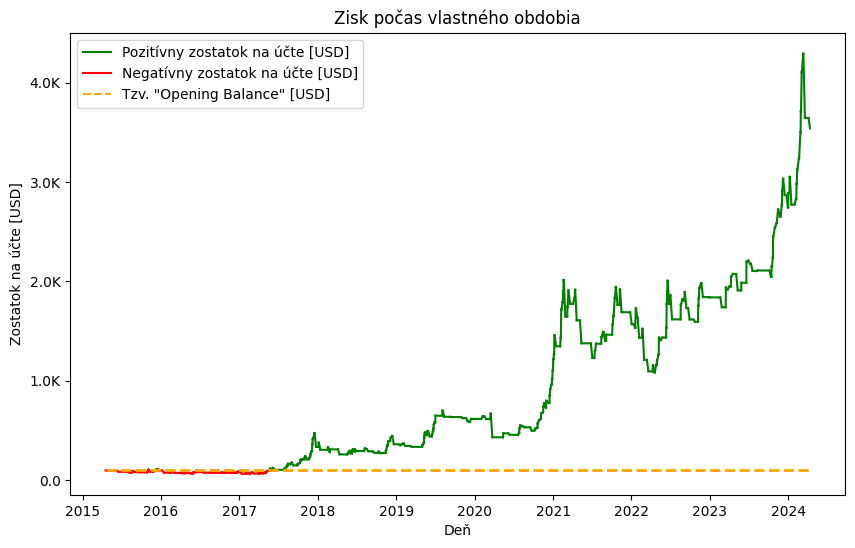

In [17]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.ticker import FuncFormatter

def format_yaxis(value, pos):
    if value >= 1e9:
        val_str = '{:1.1f}B'.format(value * 1e-9)
    elif value >= 1e6:
        val_str = '{:1.1f}M'.format(value * 1e-6)
    elif value >= 1e3:
        val_str = '{:1.1f}K'.format(value * 1e-3)
    else:
        val_str = str(value)
    return val_str

plt.figure(figsize=(10, 6))
for i in range(1, len(df['date'])):
    if df['balance'][i-1] >= initial_balance and df['balance'][i] >= initial_balance:
        plt.plot([pd.to_datetime(df['date'][i-1]), pd.to_datetime(df['date'][i])],
                 [df['balance'][i-1], df['balance'][i]], color='green')
    else:
        plt.plot([pd.to_datetime(df['date'][i-1]), pd.to_datetime(df['date'][i])],
                 [df['balance'][i-1], df['balance'][i]], color='red')

plt.plot([pd.to_datetime(df['date'][0]), pd.to_datetime(df['date'][len(df['date'])-1])], [initial_balance, initial_balance], color='orange', linestyle='dashed', linewidth=2, label='Zostatok na účte [USDT]')

legend_elements = [Line2D([0], [0], color='green', label='Pozitívny zostatok na účte [USD]'),
                   Line2D([0], [0], color='red', label='Negatívny zostatok na účte [USD]'),
                   Line2D([0], [0], color='orange', linestyle='dashed', label='Tzv. "Opening Balance" [USD]')]

plt.legend(handles=legend_elements)
plt.title('Zisk počas vlastného obdobia')
plt.xlabel('Deň')
plt.ylabel('Zostatok na účte [USD]')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_yaxis))
plt.show()

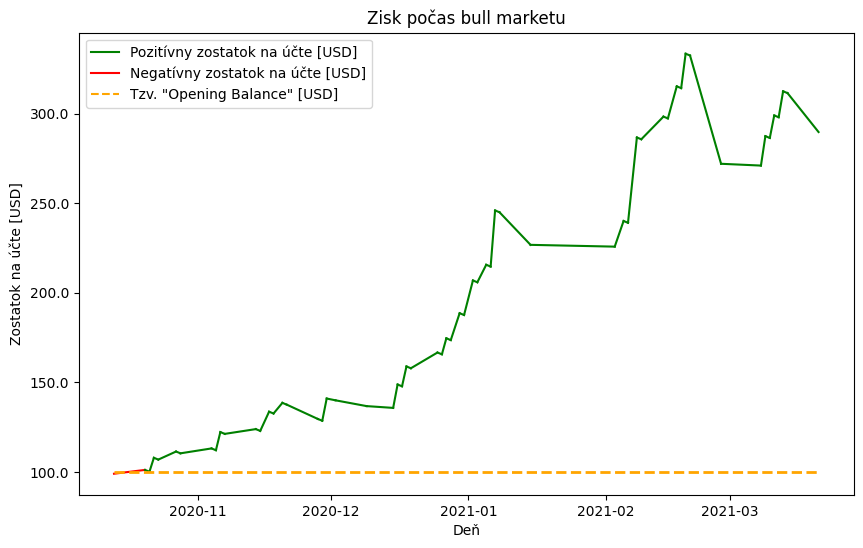

In [18]:
plt.figure(figsize=(10, 6))
for i in range(1, len(df_asc['date'])):
    if df_asc['balance'][i-1] >= initial_balance and df_asc['balance'][i] >= initial_balance:
        plt.plot([pd.to_datetime(df_asc['date'][i-1]), pd.to_datetime(df_asc['date'][i])],
                 [df_asc['balance'][i-1], df_asc['balance'][i]], color='green')
    else:
        plt.plot([pd.to_datetime(df_asc['date'][i-1]), pd.to_datetime(df_asc['date'][i])],
                 [df_asc['balance'][i-1], df_asc['balance'][i]], color='red')

plt.plot([pd.to_datetime(df_asc['date'][0]), pd.to_datetime(df_asc['date'][len(df_asc['date'])-1])], [initial_balance, initial_balance], color='orange', linestyle='dashed', linewidth=2, label='Zostatok na účte [USDT]')

legend_elements = [Line2D([0], [0], color='green', label='Pozitívny zostatok na účte [USD]'),
                   Line2D([0], [0], color='red', label='Negatívny zostatok na účte [USD]'),
                   Line2D([0], [0], color='orange', linestyle='dashed', label='Tzv. "Opening Balance" [USD]')]

plt.legend(handles=legend_elements)
plt.title('Zisk počas bull marketu')
plt.xlabel('Deň')
plt.ylabel('Zostatok na účte [USD]')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_yaxis))
plt.show()

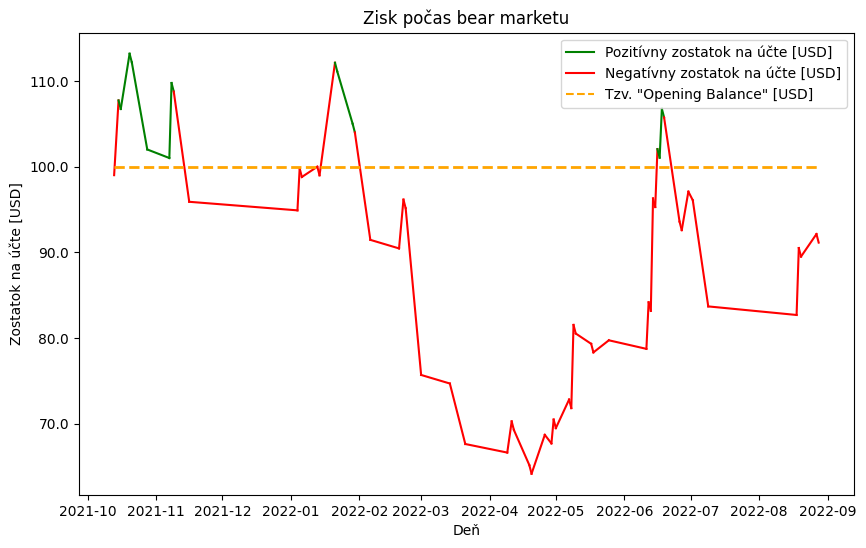

In [19]:
plt.figure(figsize=(10, 6))
for i in range(1, len(df_dsc['date'])):
    if df_dsc['balance'][i-1] >= initial_balance and df_dsc['balance'][i] >= initial_balance:
        plt.plot([pd.to_datetime(df_dsc['date'][i-1]), pd.to_datetime(df_dsc['date'][i])],
                 [df_dsc['balance'][i-1], df_dsc['balance'][i]], color='green')
    else:
        plt.plot([pd.to_datetime(df_dsc['date'][i-1]), pd.to_datetime(df_dsc['date'][i])],
                 [df_dsc['balance'][i-1], df_dsc['balance'][i]], color='red')

plt.plot([pd.to_datetime(df_dsc['date'][0]), pd.to_datetime(df_dsc['date'][len(df_dsc['date'])-1])], [initial_balance, initial_balance], color='orange', linestyle='dashed', linewidth=2, label='Zostatok na účte [USDT]')

legend_elements = [Line2D([0], [0], color='green', label='Pozitívny zostatok na účte [USD]'),
                   Line2D([0], [0], color='red', label='Negatívny zostatok na účte [USD]'),
                   Line2D([0], [0], color='orange', linestyle='dashed', label='Tzv. "Opening Balance" [USD]')]

plt.legend(handles=legend_elements)
plt.title('Zisk počas bear marketu')
plt.xlabel('Deň')
plt.ylabel('Zostatok na účte [USD]')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_yaxis))
plt.show()

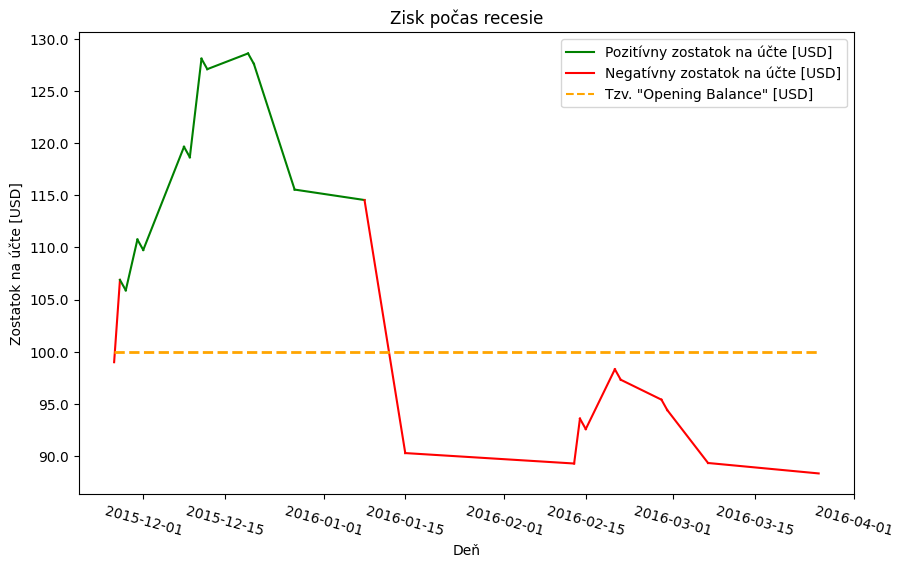

In [20]:
plt.figure(figsize=(10, 6))
for i in range(1, len(df_stg['date'])):
    if df_stg['balance'][i-1] >= initial_balance and df_stg['balance'][i] >= initial_balance:
        plt.plot([pd.to_datetime(df_stg['date'][i-1]), pd.to_datetime(df_stg['date'][i])],
                 [df_stg['balance'][i-1], df_stg['balance'][i]], color='green')
    else:
        plt.plot([pd.to_datetime(df_stg['date'][i-1]), pd.to_datetime(df_stg['date'][i])],
                 [df_stg['balance'][i-1], df_stg['balance'][i]], color='red')

plt.plot([pd.to_datetime(df_stg['date'][0]), pd.to_datetime(df_stg['date'][len(df_stg['date'])-1])], [initial_balance, initial_balance], color='orange', linestyle='dashed', linewidth=2, label='Zostatok na účte [USDT]')
plt.xticks(rotation = -15)

legend_elements = [Line2D([0], [0], color='green', label='Pozitívny zostatok na účte [USD]'),
                   Line2D([0], [0], color='red', label='Negatívny zostatok na účte [USD]'),
                   Line2D([0], [0], color='orange', linestyle='dashed', label='Tzv. "Opening Balance" [USD]')]

plt.legend(handles=legend_elements)
plt.title('Zisk počas recesie')
plt.xlabel('Deň')
plt.ylabel('Zostatok na účte [USD]')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_yaxis))
plt.show()

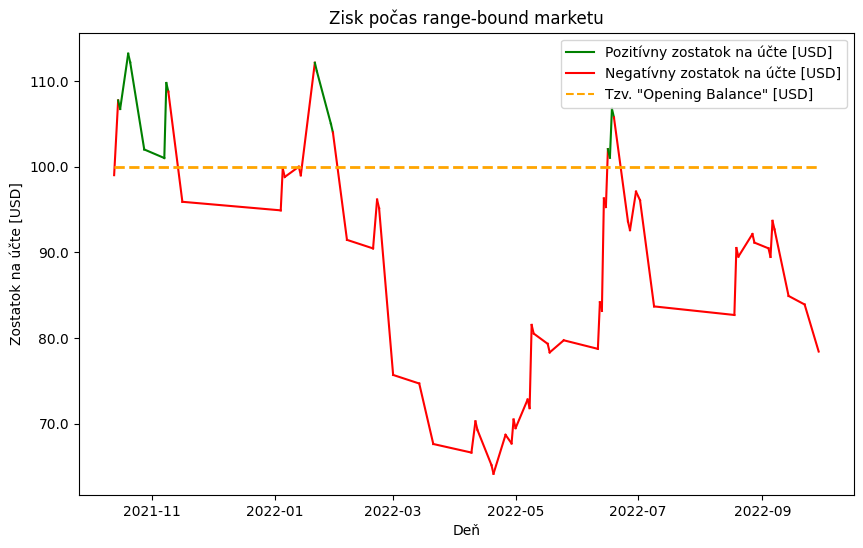

In [21]:
plt.figure(figsize=(10, 6))
for i in range(1, len(df_com['date'])):
    if df_com['balance'][i-1] >= initial_balance and df_com['balance'][i] >= initial_balance:
        plt.plot([pd.to_datetime(df_com['date'][i-1]), pd.to_datetime(df_com['date'][i])],
                 [df_com['balance'][i-1], df_com['balance'][i]], color='green')
    else:
        plt.plot([pd.to_datetime(df_com['date'][i-1]), pd.to_datetime(df_com['date'][i])],
                 [df_com['balance'][i-1], df_com['balance'][i]], color='red')

plt.plot([pd.to_datetime(df_com['date'][0]), pd.to_datetime(df_com['date'][len(df_com['date'])-1])], [initial_balance, initial_balance], color='orange', linestyle='dashed', linewidth=2, label='Zostatok na účte [USDT]')

legend_elements = [Line2D([0], [0], color='green', label='Pozitívny zostatok na účte [USD]'),
                   Line2D([0], [0], color='red', label='Negatívny zostatok na účte [USD]'),
                   Line2D([0], [0], color='orange', linestyle='dashed', label='Tzv. "Opening Balance" [USD]')]

plt.legend(handles=legend_elements)
plt.title('Zisk počas range-bound marketu')
plt.xlabel('Deň')
plt.ylabel('Zostatok na účte [USD]')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_yaxis))
plt.show()

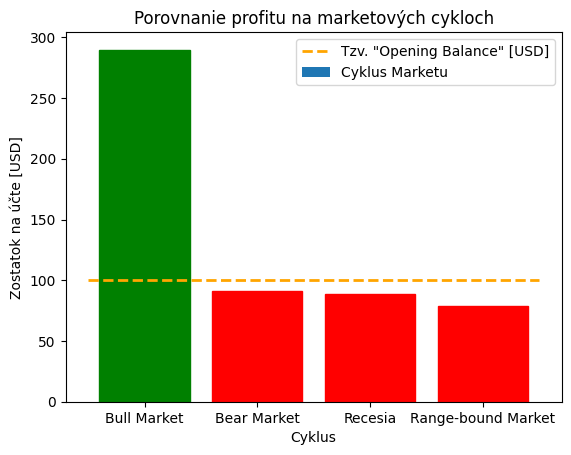

In [22]:
x_pos = ['Bull Market', 'Bear Market', 'Recesia', 'Range-bound Market']
y_pos = [final_balance_1, final_balance_2, final_balance_3, final_balance_4]

bars = plt.bar(x_pos,y_pos)
plt.plot([-0.5, len(x_pos)-0.5], [initial_balance, initial_balance], color='orange', linestyle='dashed', linewidth=2)
plt.legend(['Tzv. "Opening Balance" [USD]', 'Cyklus Marketu'])
plt.title('Porovnanie profitu na marketových cykloch')
plt.xlabel('Cyklus')
plt.ylabel('Zostatok na účte [USD]')

for i in range(len(bars)):
    if initial_balance > y_pos[i]:
        bars[i].set_color('red')
    else:
        bars[i].set_color('green')

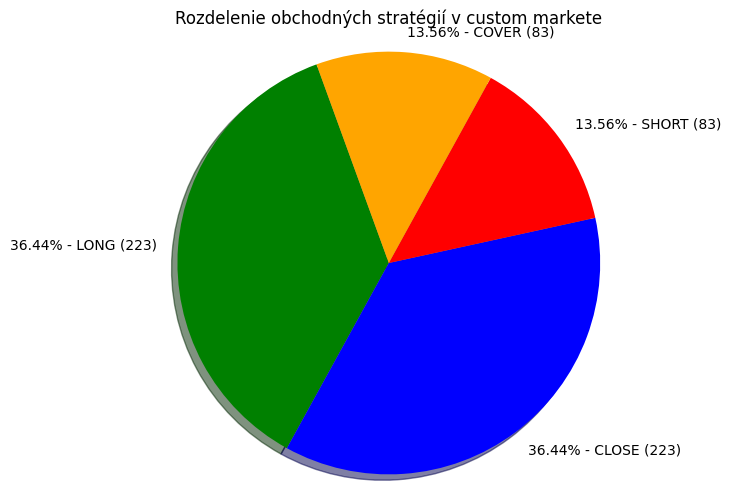

In [23]:
mode_counts = df['trade'].value_counts()
color_map = {'LONG': 'green', 'SHORT': 'red', 'CLOSE': 'blue', 'COVER': 'orange', 'NO SIGNAL': 'pink'}
colors_ordered = [color_map[mode] for mode in mode_counts.index]
labels = [f"{count / len(df) * 100:.2f}% - {mode} ({count})" for mode, count in zip(mode_counts.index, mode_counts)]
plt.figure(figsize=(6, 6))
plt.pie(mode_counts, labels=labels, autopct='', colors=colors_ordered,shadow=True, startangle=110)
plt.title('Rozdelenie obchodných stratégií v custom markete')
plt.axis('equal')

plt.show()

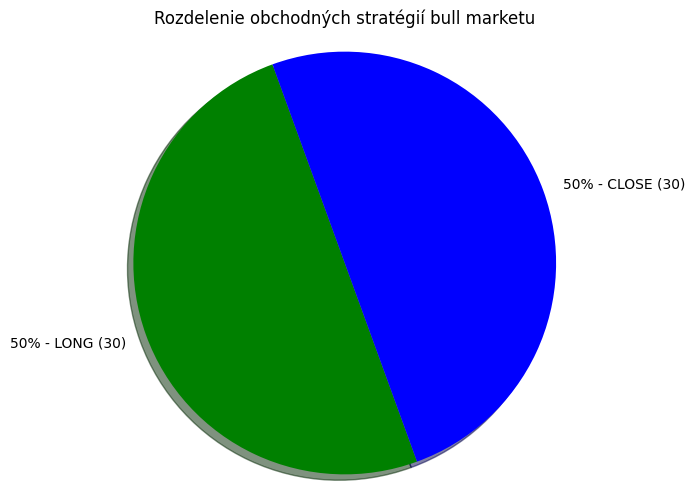

In [24]:
mode_counts = df_asc['trade'].value_counts()
color_map = {'LONG': 'green', 'SHORT': 'red', 'CLOSE': 'blue', 'COVER': 'orange'}
colors_ordered = [color_map[mode] for mode in mode_counts.index]
labels = [f"{count / len(df_asc) * 100:.0f}% - {mode} ({count})" for mode, count in zip(mode_counts.index, mode_counts)]
plt.figure(figsize=(6, 6))
plt.pie(mode_counts, labels=labels, autopct='', colors=colors_ordered,shadow=True, startangle=110)
plt.title('Rozdelenie obchodných stratégií bull marketu')
plt.axis('equal')

plt.show()

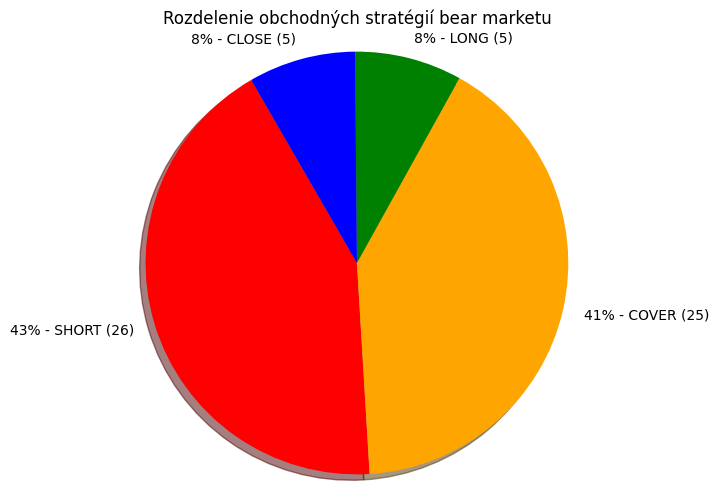

In [25]:
mode_counts = df_dsc['trade'].value_counts()
color_map = {'LONG': 'green', 'SHORT': 'red', 'CLOSE': 'blue', 'COVER': 'orange'}
colors_ordered = [color_map[mode] for mode in mode_counts.index]
labels = [f"{count / len(df_dsc) * 100:.0f}% - {mode} ({count})" for mode, count in zip(mode_counts.index, mode_counts)]
plt.figure(figsize=(6, 6))
plt.pie(mode_counts, labels=labels, autopct='', colors=colors_ordered, shadow=True, startangle=120)
plt.title('Rozdelenie obchodných stratégií bear marketu')
plt.axis('equal')

plt.show()

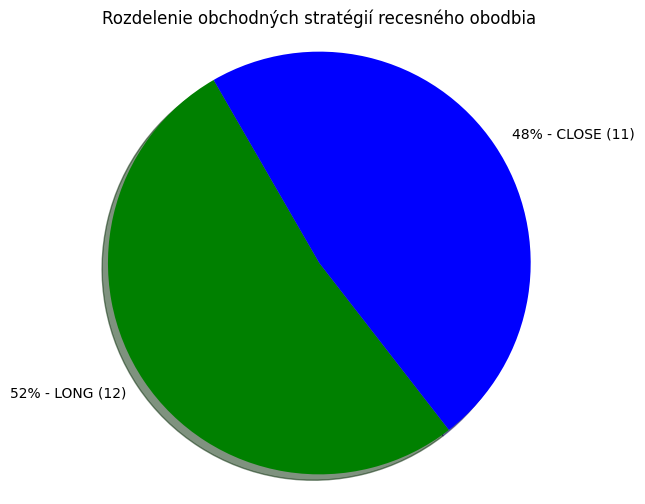

In [26]:
mode_counts = df_stg['trade'].value_counts()
color_map = {'LONG': 'green', 'SHORT': 'red', 'CLOSE': 'blue', 'COVER': 'orange'}
colors_ordered = [color_map[mode] for mode in mode_counts.index]
labels = [f"{count / len(df_stg) * 100:.0f}% - {mode} ({count})" for mode, count in zip(mode_counts.index, mode_counts)]
plt.figure(figsize=(6, 6))
plt.pie(mode_counts, labels=labels, autopct='', colors=colors_ordered, shadow=True, startangle=120)
plt.title('Rozdelenie obchodných stratégií recesného obodbia')
plt.axis('equal')

plt.show()

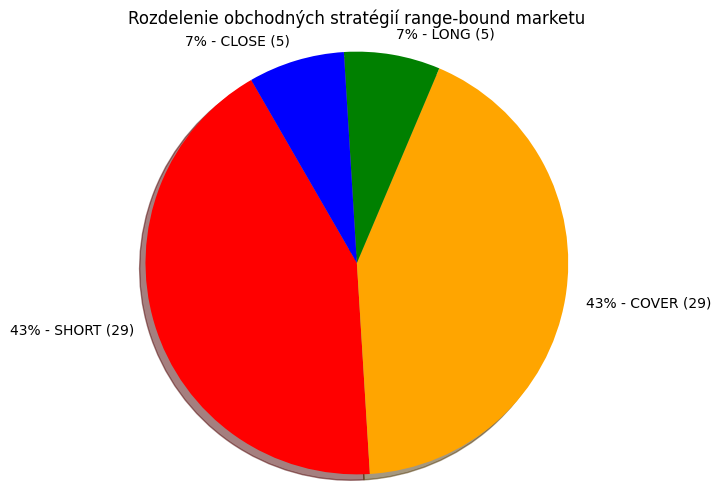

In [27]:
mode_counts = df_com['trade'].value_counts()
color_map = {'LONG': 'green', 'SHORT': 'red', 'CLOSE': 'blue', 'COVER': 'orange'}
colors_ordered = [color_map[mode] for mode in mode_counts.index]
labels = [f"{count / len(df_com) * 100:.0f}% - {mode} ({count})" for mode, count in zip(mode_counts.index, mode_counts)]
plt.figure(figsize=(6, 6))
plt.pie(mode_counts, labels=labels, autopct='', colors=colors_ordered, shadow=True, startangle=120)
plt.title('Rozdelenie obchodných stratégií range-bound marketu')
plt.axis('equal')

plt.show()

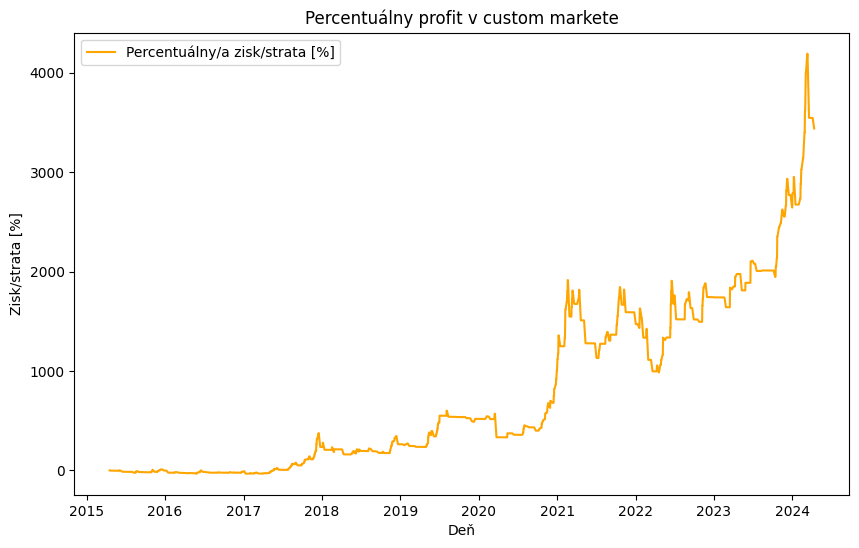

In [28]:
df['profit_percentage'] = ((df['balance'] - initial_balance) / initial_balance) * 100
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(df['date']), df['profit_percentage'], color='orange')
plt.legend(['Percentuálny/a zisk/strata [%]'])
plt.xlabel('Deň')
plt.ylabel('Zisk/strata [%]')
plt.title('Percentuálny profit v custom markete')
plt.show()

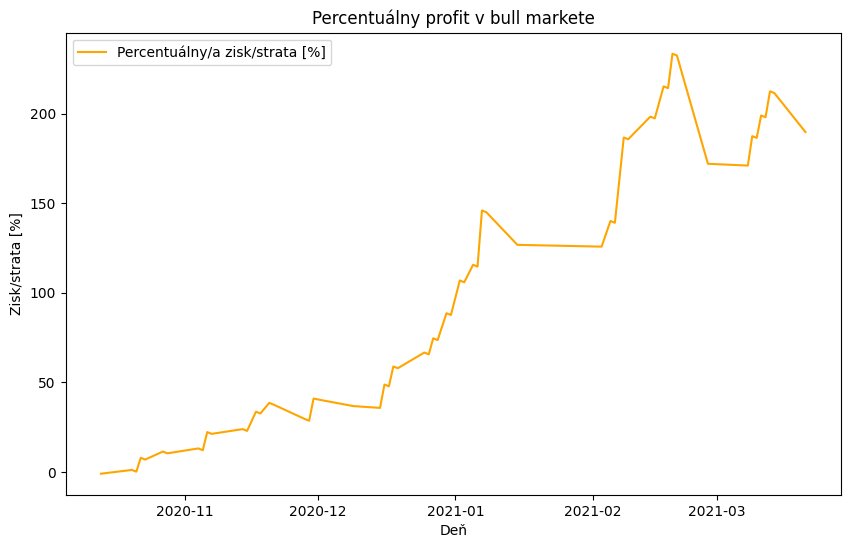

In [29]:
df_asc['profit_percentage'] = ((df_asc['balance'] - initial_balance) / initial_balance) * 100
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(df_asc['date']), df_asc['profit_percentage'], color='orange')
plt.legend(['Percentuálny/a zisk/strata [%]'])
plt.xlabel('Deň')
plt.ylabel('Zisk/strata [%]')
plt.title('Percentuálny profit v bull markete')
plt.show()

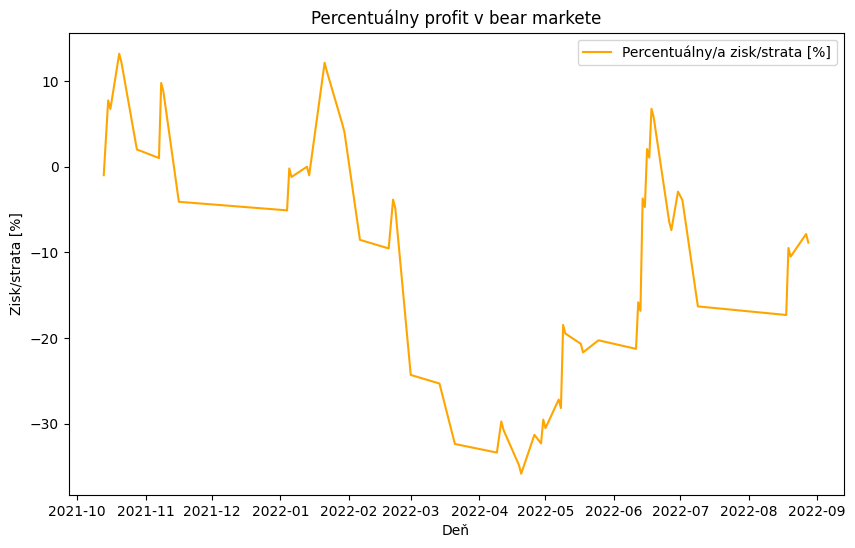

In [30]:
df_dsc['profit_percentage'] = ((df_dsc['balance'] - initial_balance) / initial_balance) * 100
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(df_dsc['date']), df_dsc['profit_percentage'], color='orange')
plt.legend(['Percentuálny/a zisk/strata [%]'])
plt.xlabel('Deň')
plt.ylabel('Zisk/strata [%]')
plt.title('Percentuálny profit v bear markete')
plt.show()

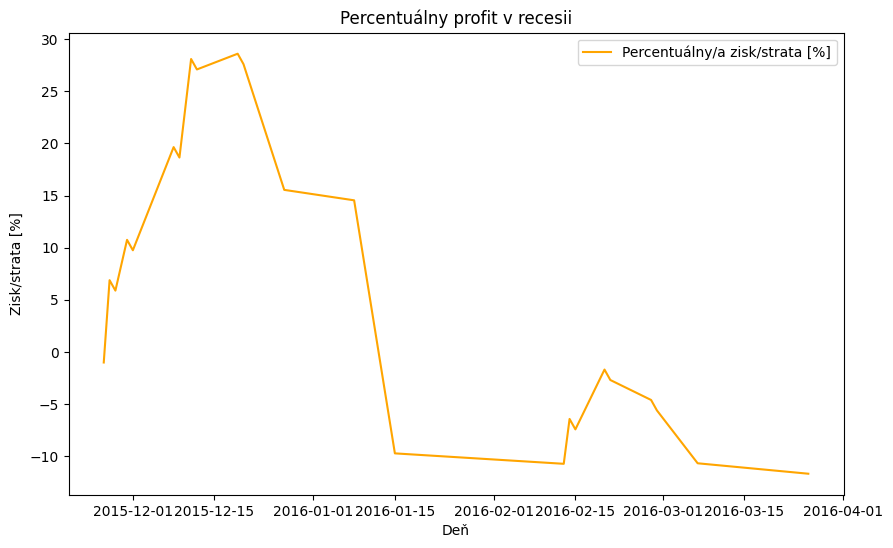

In [31]:
df_stg['profit_percentage'] = ((df_stg['balance'] - initial_balance) / initial_balance) * 100
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(df_stg['date']), df_stg['profit_percentage'], color='orange')
plt.legend(['Percentuálny/a zisk/strata [%]'])
plt.xlabel('Deň')
plt.ylabel('Zisk/strata [%]')
plt.title('Percentuálny profit v recesii')
plt.show()

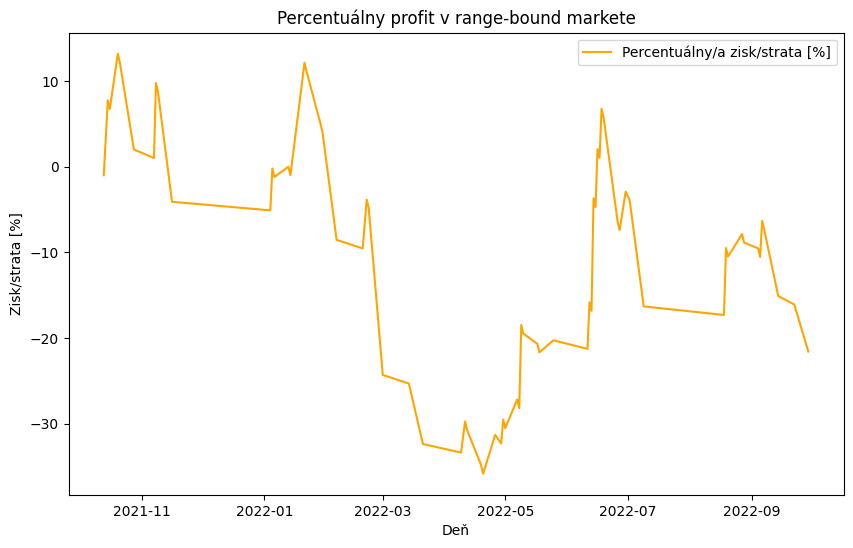

In [32]:
df_com['profit_percentage'] = ((df_com['balance'] - initial_balance) / initial_balance) * 100
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(df_com['date']), df_com['profit_percentage'], color='orange')
plt.legend(['Percentuálny/a zisk/strata [%]'])
plt.xlabel('Deň')
plt.ylabel('Zisk/strata [%]')
plt.title('Percentuálny profit v range-bound markete')
plt.show()

In [33]:
profit = [len(df[df['profit_percentage'] > 0])]
loss = [len(df[df['profit_percentage'] < 0])]
print(f"Operations in profit: {profit}")
print(f"Operations in loss: {loss}")

Operations in profit: [466]
Operations in loss: [146]


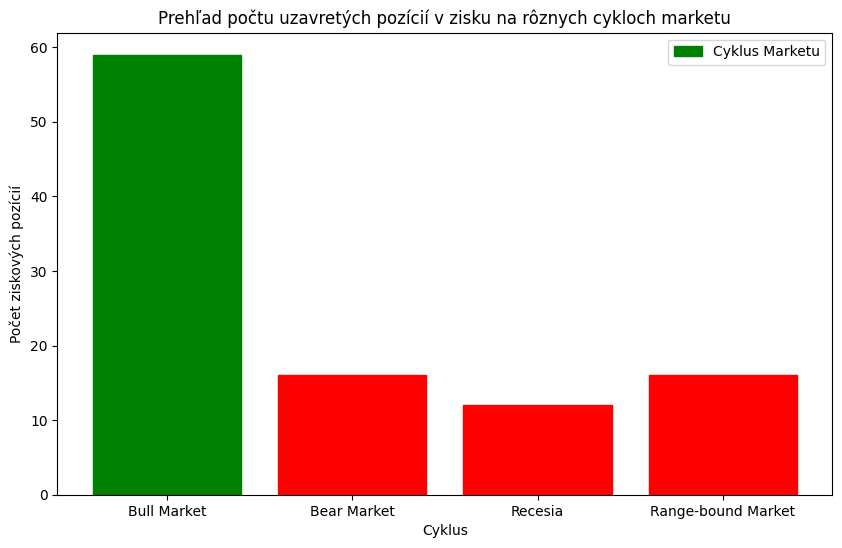

In [34]:
x_pos = ['Bull Market', 'Bear Market', 'Recesia', 'Range-bound Market']
y_pos = [len(df_asc[df_asc['profit_percentage'] > 0]), len(df_dsc[df_dsc['profit_percentage'] > 0]), len(df_stg[df_stg['profit_percentage'] > 0]), len(df_com[df_com['profit_percentage'] > 0])]
plt.figure(figsize=(10, 6))
max_count_index = y_pos.index(max(y_pos))
colors = ['red' if i != max_count_index else 'green' for i in range(len(x_pos))]

bars = plt.bar(x_pos,y_pos)

for i, bar in enumerate(bars):
    bar.set_color(colors[i])

plt.legend(['Cyklus Marketu'])
plt.title('Prehľad počtu uzavretých pozícií v zisku na rôznych cykloch marketu')
plt.xlabel('Cyklus')
plt.ylabel('Počet ziskových pozícií')

plt.show()

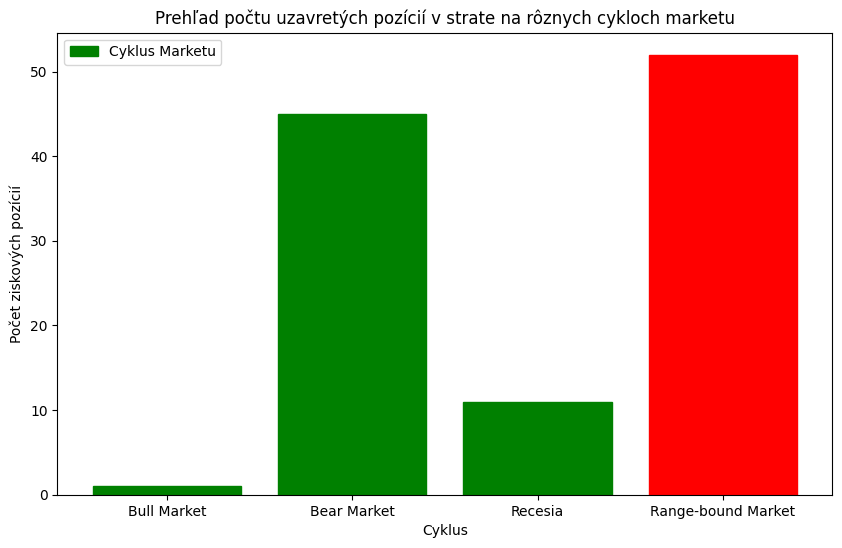

In [35]:
x_pos = ['Bull Market', 'Bear Market', 'Recesia', 'Range-bound Market']
y_pos = [len(df_asc[df_asc['profit_percentage'] < 0]), len(df_dsc[df_dsc['profit_percentage'] < 0]), len(df_stg[df_stg['profit_percentage'] < 0]), len(df_com[df_com['profit_percentage'] < 0])]
plt.figure(figsize=(10, 6))
max_count_index = y_pos.index(max(y_pos))
colors = ['green' if i != max_count_index else 'red' for i in range(len(x_pos))]

bars = plt.bar(x_pos,y_pos)

for i, bar in enumerate(bars):
    bar.set_color(colors[i])

plt.legend(['Cyklus Marketu'])
plt.title('Prehľad počtu uzavretých pozícií v strate na rôznych cykloch marketu')
plt.xlabel('Cyklus')
plt.ylabel('Počet ziskových pozícií')

plt.show()